# **KAIST EE**
#  **[EE488] note 01A. Maze (DQN)**
## **Instructor**: Prof. Yoon, Young-Gyu (ygyoon@kaist.ac.kr)
### This example code was prepared by EE488 teaching assistants Han, Seungjae (jay0118@kaist.ac.kr) & Shin, Changyeop (scey26@kaist.ac.kr).

- Class Date : 22.03.xx.
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

---

### 0. In this example, we will implement a simple version of DQN for solving a simple custom maze environment (see the image below). Each location corresponds to a state, and the agent needs to move up/down/left/right to move from Start to Goal.


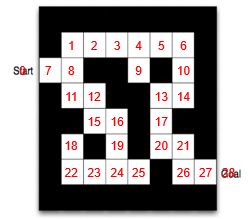

### 1. As usual, let's start with **importing libraries**!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import gym
from datetime import datetime
import time

from matplotlib import animation
from IPython.display import HTML, clear_output

import torch
from torch.distributions import Categorical
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from collections import deque               # this simplifies the implementation of the replay buffer

# For reproducibility, set seed for random functions.
SEED = 0

# set seed
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

### 3. Here's our **custom environment**. It's basically the same as the maze shown above.

In [2]:
class maze_env():
# the maze shown above is scripted as a custom environment.
    def __init__(self):
        self.state = 7
        self.done = 0
        self.action_space = gym.spaces.Discrete(4)

    def step(self, action):
        state = self.state

        if state==0:
            if action==0:
                state, reward, done = 0, -1, 0
            elif action==1:
                state, reward, done = 0, -1, 0
            elif action==2:
                state, reward, done = 0, -1, 0
            elif action==3:                   
                state, reward, done = 7, -1, 0
            else:          
                print('action error')                
        elif state==1:
            if action==0:
                state, reward, done = 1, -1, 0
            elif action==1:
                state, reward, done = 8, -1, 0
            elif action==2:
                state, reward, done = 1, -1, 0
            elif action==3:              
                state, reward, done = 2, -1, 0
            else:          
                print('action error')                      
        elif state==2:
            if action==0:
                state, reward, done = 2, -1, 0
            elif action==1:
                state, reward, done = 2, -1, 0
            elif action==2:
                state, reward, done = 1, -1, 0
            elif action==3:                 
                state, reward, done = 3, -1, 0
            else:          
                print('action error')                      
        elif state==3:
            if action==0:
                state, reward, done = 3, -1, 0
            elif action==1:
                state, reward, done = 3, -1, 0
            elif action==2:
                state, reward, done = 2, -1, 0
            elif action==3:                
                state, reward, done = 4, -1, 0
            else:          
                print('action error')                      
        elif state==4:
            if action==0:
                state, reward, done = 4, -1, 0
            elif action==1:
                state, reward, done = 9, -1, 0
            elif action==2:
                state, reward, done = 3, -1, 0
            elif action==3:                  
                state, reward, done = 5, -1, 0
            else:          
                print('action error')                      
        elif state==5:
            if action==0:
                state, reward, done = 5, -1, 0
            elif action==1:
                state, reward, done = 5, -1, 0
            elif action==2:
                state, reward, done = 4, -1, 0
            elif action==3:                 
                state, reward, done = 6, -1, 0
            else:          
                print('action error')                      
        elif state==6:
            if action==0:
                state, reward, done = 6, -1, 0
            elif action==1:
                state, reward, done = 10, -1, 0
            elif action==2:
                state, reward, done = 5, -1, 0
            elif action==3:                   
                state, reward, done = 6, -1, 0
            else:          
                print('action error')                      
        elif state==7:
            if action==0:
                state, reward, done = 7, -1, 0
            elif action==1:
                state, reward, done = 7, -1, 0
            elif action==2:
                state, reward, done = 0, -1, 0
            elif action==3:                    
                state, reward, done = 8, -1, 0
            else:          
                print('action error')                      
        elif state==8:
            if action==0:
                state, reward, done = 1, -1, 0
            elif action==1:
                state, reward, done = 11, -1, 0
            elif action==2:
                state, reward, done = 7, -1, 0
            elif action==3:                    
                state, reward, done = 8, -1, 0
            else:          
                print('action error')                      
        elif state==9:
            if action==0:
                state, reward, done = 4, -1, 0
            elif action==1:
                state, reward, done = 9, -1, 0
            elif action==2:
                state, reward, done = 9, -1, 0
            elif action==3:                  
                state, reward, done = 9, -1, 0
            else:          
                print('action error')                      
        elif state==10:
            if action==0:
                state, reward, done = 6, -1, 0
            elif action==1:
                state, reward, done = 14, -1, 0
            elif action==2:
                state, reward, done = 10, -1, 0
            elif action==3:                 
                state, reward, done = 10, -1, 0
            else:          
                print('action error')                      
        elif state==11:
            if action==0:
                state, reward, done = 8, -1, 0
            elif action==1:
                state, reward, done = 11, -1, 0
            elif action==2:
                state, reward, done = 11, -1, 0
            elif action==3:                  
                state, reward, done = 12, -1, 0
            else:          
                print('action error')                      
        elif state==12:
            if action==0:
                state, reward, done = 12, -1, 0
            elif action==1:
                state, reward, done = 15, -1, 0
            elif action==2:
                state, reward, done = 11, -1, 0
            elif action==3:                   
                state, reward, done = 12, -1, 0
            else:          
                print('action error')                      
        elif state==13:
            if action==0:
                state, reward, done = 13, -1, 0
            elif action==1:
                state, reward, done = 17, -1, 0
            elif action==2:
                state, reward, done = 13, -1, 0
            elif action==3:                   
                state, reward, done = 14, -1, 0
            else:          
                print('action error')                      
        elif state==14:
            if action==0:
                state, reward, done = 10, -1, 0
            elif action==1:
                state, reward, done = 14, -1, 0
            elif action==2:
                state, reward, done = 13, -1, 0
            elif action==3:                   
                state, reward, done = 14, -1, 0
            else:          
                print('action error')                      
        elif state==15:
            if action==0:
                state, reward, done = 12, -1, 0
            elif action==1:
                state, reward, done = 15, -1, 0
            elif action==2:
                state, reward, done = 15, -1, 0
            elif action==3:                    
                state, reward, done = 16, -1, 0
            else:          
                print('action error')                      
        elif state==16:
            if action==0:
                state, reward, done = 16, -1, 0
            elif action==1:
                state, reward, done = 19, -1, 0
            elif action==2:
                state, reward, done = 15, -1, 0
            elif action==3:                    
                state, reward, done = 16, -1, 0
            else:          
                print('action error')                      
        elif state==17:
            if action==0:
                state, reward, done = 13, -1, 0
            elif action==1:
                state, reward, done = 20, -1, 0
            elif action==2:
                state, reward, done = 17, -1, 0
            elif action==3:                    
                state, reward, done = 17, -1, 0
            else:          
                print('action error')                      
        elif state==18:
            if action==0:
                state, reward, done = 18, -1, 0
            elif action==1:
                state, reward, done = 22, -1, 0
            elif action==2:
                state, reward, done = 18, -1, 0
            elif action==3:                    
                state, reward, done = 18, -1, 0
            else:          
                print('action error')                      
        elif state==19:
            if action==0:
                state, reward, done = 16, -1, 0
            elif action==1:
                state, reward, done = 24, -1, 0
            elif action==2:
                state, reward, done = 19, -1, 0
            elif action==3:                    
                state, reward, done = 19, -1, 0
            else:          
                print('action error')                      
        elif state==20:
            if action==0:
                state, reward, done = 17, -1, 0
            elif action==1:
                state, reward, done = 20, -1, 0
            elif action==2:
                state, reward, done = 20, -1, 0
            elif action==3:                    
                state, reward, done = 21, -1, 0
            else:          
                print('action error')                      
        elif state==21:
            if action==0:
                state, reward, done = 21, -1, 0
            elif action==1:
                state, reward, done = 26, -1, 0
            elif action==2:
                state, reward, done = 20, -1, 0
            elif action==3:                   
                state, reward, done = 21, -1, 0
            else:          
                print('action error')                      
        elif state==22:
            if action==0:
                state, reward, done = 18, -1, 0
            elif action==1:
                state, reward, done = 22, -1, 0
            elif action==2:
                state, reward, done = 22, -1, 0
            elif action==3:                    
                state, reward, done = 23, -1, 0
            else:          
                print('action error')                      
        elif state==23:
            if action==0:
                state, reward, done = 23, -1, 0
            elif action==1:
                state, reward, done = 23, -1, 0
            elif action==2:
                state, reward, done = 22, -1, 0
            elif action==3:                   
                state, reward, done = 24, -1, 0
            else:          
                print('action error')                      
        elif state==24:
            if action==0:
                state, reward, done = 19, -1, 0
            elif action==1:
                state, reward, done = 24, -1, 0
            elif action==2:
                state, reward, done = 23, -1, 0
            elif action==3:                    
                state, reward, done = 25, -1, 0
            else:          
                print('action error')                      
        elif state==25:
            if action==0:
                state, reward, done = 25, -1, 0
            elif action==1:
                state, reward, done = 25, -1, 0
            elif action==2:
                state, reward, done = 24, -1, 0
            elif action==3:                    
                state, reward, done = 25, -1, 0
            else:          
                print('action error')                      
        elif state==26:
            if action==0:
                state, reward, done = 21, -1, 0
            elif action==1:
                state, reward, done = 26, -1, 0
            elif action==2:
                state, reward, done = 26, -1, 0
            elif action==3:                 
                state, reward, done = 27, -1, 0
            else:          
                print('action error')                      
        elif state==27:
            if action==0:
                state, reward, done = 27, -1, 0
            elif action==1:
                state, reward, done = 27, -1, 0
            elif action==2:
                state, reward, done = 26, -1, 0
            elif action==3:                    
                state, reward, done = 27, 0, 1
            else:          
                print('action error')                                    
        else:          
                print('state error')             

        self.state = state
        self.done = done
                
        return state, reward, done

### 4. Let's define our **Q-network**. We are going to use onehot coding for the input (why?). 

In [3]:
class QNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(28, 4)     # 28-dimensional observation (onehot encoding)

    def forward(self, x):
        x = self.fc(x)

        return x

### 5. Let's make the **environment**.

In [4]:
env = maze_env()

# env.action_space.n

### 6. Let's define **ReplayMemory** that stores state, action, reward, and next_state (i.e., $(S_t, A_t, R_t, S_{t+1})$). This just a deque with a sampling function.

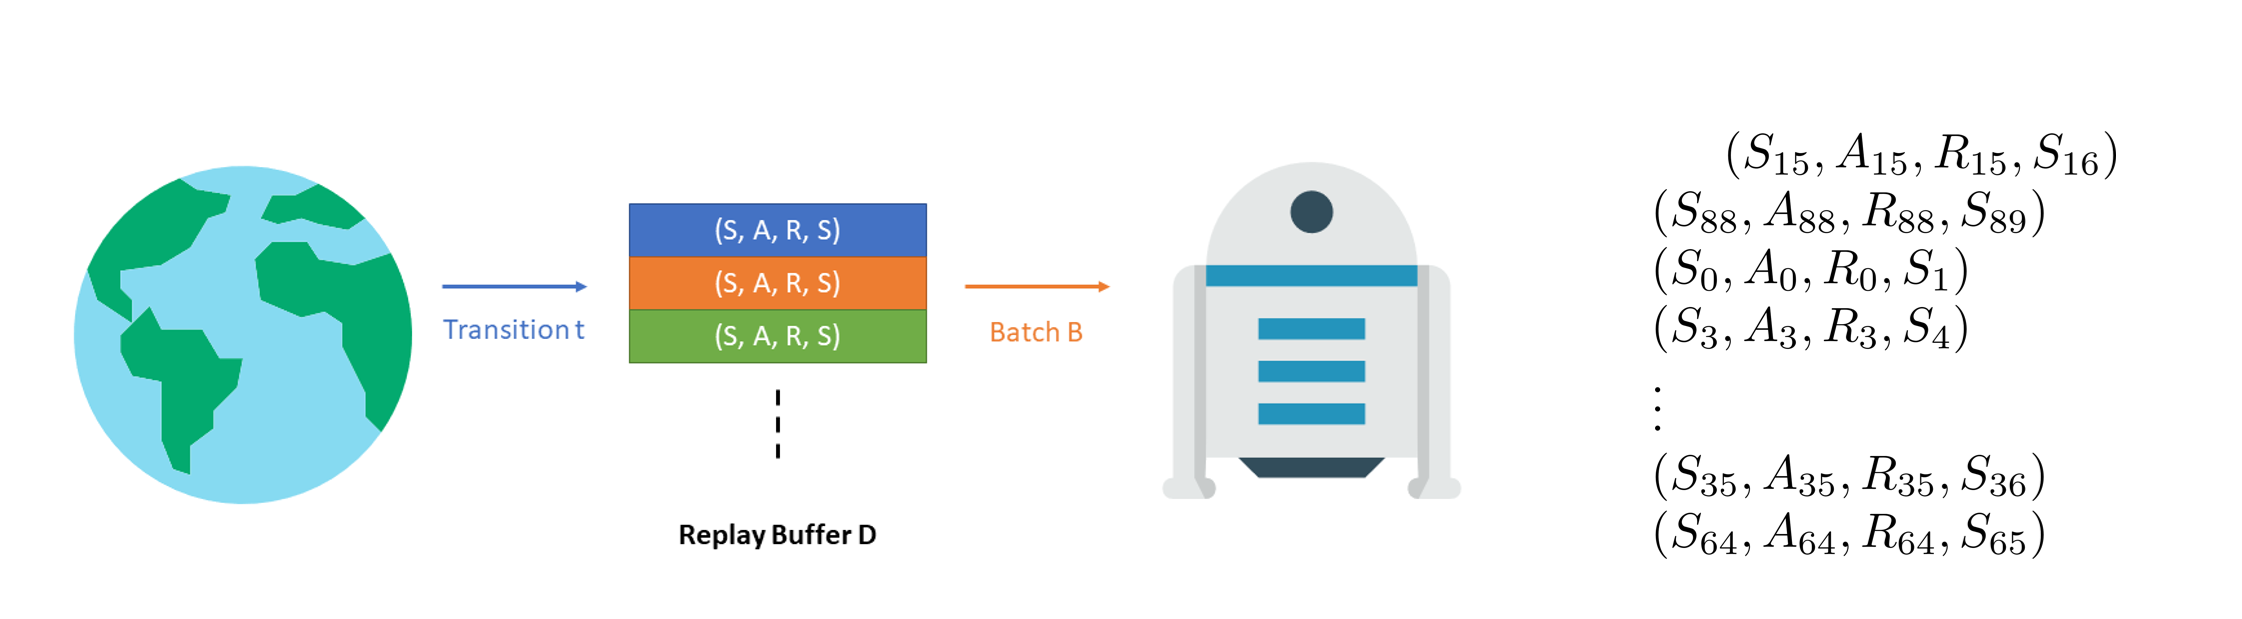

In [5]:
class ReplayMemory(object):
    """Facilitates memory replay."""

    def __init__(self, buffer_size):
        self.memory = deque(maxlen=buffer_size)

    def append(self, m):
        self.memory.append(m)

    def sample(self, batch_size):
        batch = random.sample(self.memory, batch_size)
        return map(lambda x: Variable(torch.cat(x, 0).to(device)), zip(*batch))

### 9. Here is a **preprocessing** function.

In [6]:
def preprocess(state):
    return torch.tensor(torch.from_numpy(np.eye(28)[state]).float(), dtype=torch.float32).unsqueeze(0)

### 10. Here are our **hyperparameters**.

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"

buffer_size = 1000000 # size of replaymemory
batch_size = 64
target_interval = 500 # interval of updating Q_target
learn_interval = 1 # interval of updating Q
lr = 0.01

save_interval = 100 # interval of saving trained model
max_time_steps = 300

# Hyperparameters for epsilon-greedy algorithm
epsilon = 0.1
discount = 0.99 # discount factor
max_episodes = 500

action_size = env.action_space.n

action_idx = np.arange(action_size)
probability = np.zeros(action_size, np.float32)

### 11. Here's our **replay buffer** (using ReplayMemory function we built). 

In [22]:
memory = ReplayMemory(buffer_size)

### 12. Let's **initialize our networks** (Q-network & target network).

In [23]:
# network and optimizer
Q = QNetwork().to(device)
optimizer = torch.optim.Adam(Q.parameters(), lr=lr)

# target network
Q_target = QNetwork().to(device)

criterion = nn.MSELoss()

### 13. Let's test the performance of the untrained network.

In [24]:
# TEST (with untrained Q-network)
rewards = 0

for t in range(max_time_steps):
    
    state = torch.from_numpy(np.eye(28)[env.state]).float().to(device)
    action = torch.argmax(Q(state)).item()     
    # action = random.randrange(4)  
    state, reward, done = env.step(action) 
    rewards = rewards + reward        
    if done: 
      break
            
print("Total reward is " + str(rewards) + ".")

Total reward is 0.


14. Here is function that select the action with epsilon-greedy algorithm and get next state, reward, and done.

In [25]:
def act(state, epsilon):
    # epsilon-greedy algorithm
    probability.fill(epsilon / action_size)
    with torch.no_grad():
        qvalues, argq = Q(state.to(device)).data.cpu().max(1)
        probability[argq.item()] += 1 - epsilon

        action = np.random.choice(action_idx, p=probability)

        next_state, reward, done = env.step(action)
        
        #print(env.state)
        next_state = preprocess(next_state)

        memory.append(
            (state, torch.LongTensor([int(action)]), torch.Tensor([reward]), next_state, torch.Tensor([done]))
        )
        return next_state, reward, done, action # qvalues.item()

### 15. Define a function to **keep track of the performance**.

In [26]:
def plt_history():
    clear_output(True)
    plt.figure(figsize=[16, 9])
    plt.subplot(1, 2, 1)
    plt.title("Reward history")
    line1, = plt.plot(reward_history)
    line2, = plt.plot(reward_best_history)
    plt.legend(handles=(line1, line2), labels=('reward', 'best_reward'))

    plt.subplot(1,2,2)
    plt.title("Loss history")
    plt.plot(loss_history)
    target_update_loss = []
    for i in target_update_episode_history:
        target_update_loss.append(loss_history[i])
    plt.scatter(target_update_episode_history, target_update_loss, c='r', s=3)
    
    plt.grid()
    plt.show()

### 15. This is the **main loop for training**.

We randomly samples a batch of $ (S, A, R, S')$ from the replay 
buffer and then calculate the following loss and to perform back-propagation.

$$ \mathcal{L} = (Q(s,a) - \mathbb{E}[r+ \gamma Q_{target}(s',a')])^2  $$


Compare the code with the following pseudo-code.



<font color='purple'>Initialize</font> replay buffer

<font color='purple'>Initialize</font> Q network with random weights $\theta$

<font color='purple'>Initialize</font> target network (Q’) with $\theta^{-}=\theta$

<font color='purple'>for</font> episode in <font color='brown'>range</font>(n_episode):

> <font color='purple'>Initialize</font> sequence $s_1$ 

> <font color='purple'>for</font>  t in <font color='brown'>range</font>(t_max):

>>  <font color='purple'>if</font>  random variable <  $\epsilon$:	
>>> select random action $a_t$		

>> <font color='purple'>else</font>:
>>> <font color='purple'>select</font>  $a_t = \arg \max_a Q(s_t, a;\theta) $ 

>>  <font color='purple'>perform</font> $a_t$ and take $r_t$ and $s_{t+1}$

>>  <font color='purple'>store</font> $(s_t, a_t, r_t , s_{t+1})$ in replay buffer



>>  <font color='purple'>sample</font> a minibatch of $(s_k, a_k, r_k , s_{k+1})$ from replay buffer


>>  <font color='purple'>if</font>   episode terminates at step $k+1$:
>>> $y_k = r_k$ 			 

>> <font color='purple'>else</font>:

>>> $y_k = r_k + \gamma \arg \max_a Q(s_k, a_k;\theta^{-})$

>> Update $ \theta \leftarrow \theta - \alpha \nabla (y_k - Q(s_k, a_k;\theta^{-})^2 $

>> Update $ \theta^{-} \leftarrow \theta$ every C steps


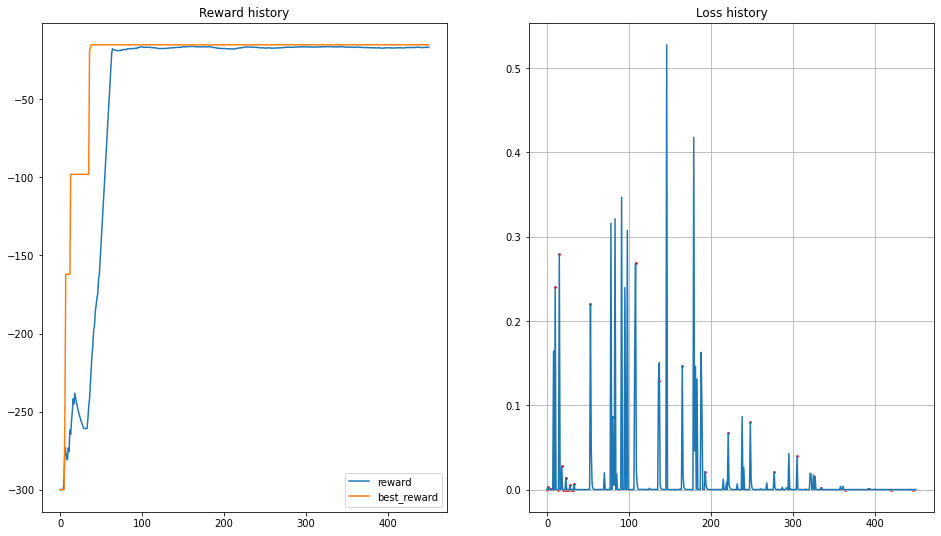

episode 450 (16562): time 0.36s mem 16562 eps 0.10000 len 16 r -15.000 avg_r -16.700


In [27]:
t = 0
recent_rewards = deque(maxlen=30)

reward_history = []
reward_best_history = []
loss_history = []

target_update_episode_history = []

best_rewards = -max_time_steps

for ep in range(max_episodes):
    env = maze_env()
        
    state = preprocess(env.state)

    ep_len = 0

    start_time = time.time()

    done = False
    
    score = 0
    while not done and ep_len < max_time_steps:
        if t % target_interval == 0:
            Q_target.load_state_dict(Q.state_dict())
            target_update_episode_history.append(ep)
        
        next_state, reward, done, action = act(state, epsilon)

        score += reward
        state = next_state

        t += 1
        ep_len += 1

        if ep_len % learn_interval == 0 and len(memory.memory) >= batch_size:
            states, actions, rewards, next_states, dones = memory.sample(batch_size)            
            pred = Q(states).gather(1, actions.unsqueeze(1)).squeeze(1)            
            target = rewards + (1 - dones) * discount * Q_target(next_states).max(1)[0]

            loss = criterion(pred, target)

            optimizer.zero_grad()
            loss.backward()
            # clip = 1.0
            # nn.utils.clip_grad_norm(Q.parameters(), clip)
            # [Optional] Gradient clipping for stable training.
            optimizer.step()
    
    # measuring stuffs.
    recent_rewards.append(score)
    recent_average_reward = np.mean(recent_rewards)
    reward_history.append(recent_average_reward)
    reward_best_history.append(best_rewards)
    loss_history.append(loss.item())


    # save the best model
    # Note that best reward can be occur while epsilon is big, which occured by chance.
    if score > best_rewards:
        best_rewards = score

    
    # Plot history.
    if ep % 50 == 0:
        plt_history()
        print(
            "episode %d (%d): time %.2fs mem %d eps %.5f len %d r %.3f avg_r %.3f"
            % (
                ep,
                t,
                time.time() - start_time,
                len(memory.memory),
                epsilon,
                ep_len,
                score,
                recent_average_reward
            )
        )

### 16. Now, let's **evaluate** the performance of the trained network!

In [28]:
# TEST (with trained Q-network)
env = maze_env()
rewards = 0

for t in range(max_time_steps):
    
    state = preprocess(env.state)
    action = torch.argmax(Q(state.to(device))).item()     
    state, reward, done = env.step(action) 
    rewards = rewards + reward        

    if done: 
      break;     

print("Total reward is " + str(rewards) + ".")

Total reward is -15.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Below is a visualization of states.

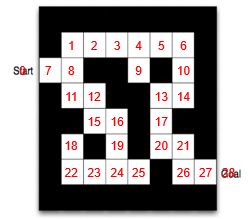

And below shows the theoretical state values.

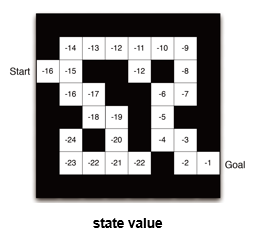

### 17. Compare the learned Q-function with the **therotical state values**.

In [29]:
for i in range(28):    
    qvalues = Q(torch.from_numpy(np.eye(28)[i]).float().to(device)).detach().cpu().numpy()    
    print(qvalues)

[-15.66646   -15.664828  -15.6644745 -14.828463 ]
[-13.121376 -13.980397 -13.122608 -12.215901]
[-12.215355 -12.212636 -13.123534 -11.354285]
[-11.350883 -11.347567 -12.215223 -10.465568]
[-10.463621 -11.372772 -11.353619  -9.542684]
[ -9.529293  -9.533772 -10.465987  -8.647729]
[-8.6470785 -7.7264333 -9.542592  -8.647717 ]
[-14.82765  -14.829164 -15.664051 -13.980354]
[-13.123692 -14.829144 -14.833396 -13.980272]
[-10.4667425 -11.291349  -11.354341  -11.354132 ]
[-8.64432   -6.794476  -7.7227507 -7.723001 ]
[-13.978531 -14.825258 -14.829094 -15.666098]
[-15.66472   -16.520939  -14.827517  -15.6659155]
[-5.84888   -4.9099674 -5.850315  -6.7944436]
[-7.7131915 -6.7946234 -5.8507805 -6.7934456]
[-15.663456 -16.522373 -16.521856 -17.336624]
[-17.334496 -18.183098 -16.523014 -17.336464]
[-5.8495893 -3.9472198 -4.9009843 -4.9006624]
[-21.398533 -20.596119 -21.400362 -21.400396]
[-17.334713 -18.996021 -18.179989 -18.179012]
[-4.918017  -3.9389262 -3.942605  -2.969051 ]
[-2.9562654 -1.9940472

### **Congratulations**! You sucessfully trained a DQN!